In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# \s+을 통해 여러 공백을 구분자로 설정
df = pd.read_csv("C:/Users/choha/Downloads/seeds/seeds_dataset.txt",sep='\s+',header = None) 
df

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [77]:
col = ["area","perimeter","compactness","length_kernel","width_kernel","asymmetry_coefficient","length_kernel_groove","target"]

In [78]:
df.columns = col
df

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coefficient,length_kernel_groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [6]:
X = df.drop("target",axis = 1)

In [7]:
y = df["target"]

In [ ]:
# DNN CNN 대체 split_sequence CNN 

# DNN 사용

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = pd.get_dummies(y-1)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.75, random_state = 0)

In [10]:
X_train.shape[1]

7

In [11]:
y_train.shape

(157, 3)

In [12]:
from keras.layers import Input,Dense,Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
inputs = Input(shape=(7,))
x = Dense(64, activation='relu')(inputs)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

# 출력 레이어
outputs = Dense(3, activation='softmax')(x)


model = Model(inputs=inputs, outputs=outputs)

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense (Dense)               (None, 64)                512       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4867 (19.01 KB)
Trainable params: 4867 (19.01 K

In [14]:
# 모델 학습
model_history = model.fit(x=X_train, y=y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test.values,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
3/3 [==============================] - 1s 99ms/step - loss: 0.8520 - accuracy: 0.6051 - val_loss: 0.4631 - val_accuracy: 0.8302
Epoch 2/30
3/3 [==============================] - 0s 18ms/step - loss: 0.5403 - accuracy: 0.8280 - val_loss: 0.3094 - val_accuracy: 0.8679
Epoch 3/30
3/3 [==============================] - 0s 17ms/step - loss: 0.4010 - accuracy: 0.8408 - val_loss: 0.2457 - val_accuracy: 0.8868
Epoch 4/30
3/3 [==============================] - 0s 19ms/step - loss: 0.3412 - accuracy: 0.8790 - val_loss: 0.2189 - val_accuracy: 0.8868
Epoch 5/30
3/3 [==============================] - 0s 18ms/step - loss: 0.3009 - accuracy: 0.9108 - val_loss: 0.2218 - val_accuracy: 0.9245
Epoch 6/30
3/3 [==============================] - 0s 17ms/step - loss: 0.2193 - accuracy: 0.9108 - val_loss: 0.2505 - val_accuracy: 0.9245
Epoch 7/30
3/3 [==============================] - 0s 21ms/step - loss: 0.3523 - accuracy: 0.8662 - val_loss: 0.2300 - val_accuracy: 0.9434
Epoch 8/30
3/3 [===========

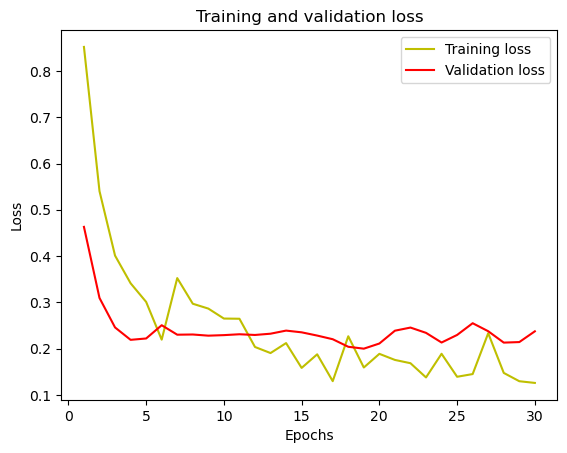

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

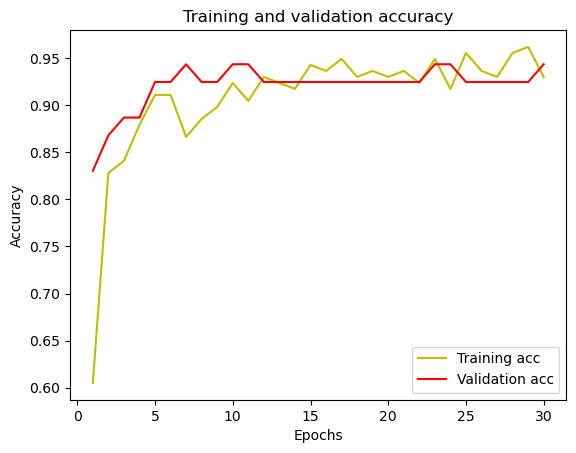

In [16]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# CNN split_sequence 적용하기 

In [126]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [150]:
X = df.drop("target",axis = 1)
y = df["target"]

In [151]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [152]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [153]:
# Function to split sequences
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [154]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

# Apply sequence transformation using time step of 5 for both train and test data
X_train_seq, y_train_seq = split_sequences(train_set, 5)
X_test_seq, y_test_seq = split_sequences(test_set, 5)

In [155]:
# One-hot encode the labels
y_train_onehot = pd.get_dummies(y_train_seq).values
y_test_onehot = pd.get_dummies(y_test_seq).values

# Define the CNN model
n_timesteps, n_features, n_outputs = X_train_seq.shape[1], X_train_seq.shape[2], y_train_onehot.shape[1]
input_layer = Input(shape=(n_timesteps, n_features))


In [156]:
input_layer = Input(shape=(n_timesteps, n_features))

conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
flat = Flatten()(conv1)
dens = Dense(64, activation="relu")(flat)
outputs = Dense(n_outputs, activation="softmax")(dens)

model = Model(input_layer, outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 5, 7)]            0         
                                                                 
 conv1d_16 (Conv1D)          (None, 3, 64)             1408      
                                                                 
 flatten_15 (Flatten)        (None, 192)               0         
                                                                 
 dense_33 (Dense)            (None, 64)                12352     
                                                                 
 dense_34 (Dense)            (None, 3)                 195       
                                                                 
Total params: 13955 (54.51 KB)
Trainable params: 13955 (54.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [157]:
# Fit the model
history = model.fit(X_train_seq, y_train_onehot, epochs=30, batch_size=32, validation_data=(X_test_seq, y_test_onehot))

Epoch 1/30
6/6 [==============================] - 2s 80ms/step - loss: 1.1015 - accuracy: 0.3659 - val_loss: 0.9934 - val_accuracy: 0.5526
Epoch 2/30
6/6 [==============================] - 0s 19ms/step - loss: 0.9491 - accuracy: 0.6646 - val_loss: 0.9229 - val_accuracy: 0.6053
Epoch 3/30
6/6 [==============================] - 0s 22ms/step - loss: 0.8455 - accuracy: 0.7256 - val_loss: 0.8461 - val_accuracy: 0.6316
Epoch 4/30
6/6 [==============================] - 0s 24ms/step - loss: 0.7430 - accuracy: 0.8232 - val_loss: 0.7667 - val_accuracy: 0.7105
Epoch 5/30
6/6 [==============================] - 0s 21ms/step - loss: 0.6493 - accuracy: 0.8415 - val_loss: 0.6992 - val_accuracy: 0.7632
Epoch 6/30
6/6 [==============================] - 0s 20ms/step - loss: 0.5615 - accuracy: 0.8659 - val_loss: 0.6370 - val_accuracy: 0.7632
Epoch 7/30
6/6 [==============================] - 0s 23ms/step - loss: 0.4873 - accuracy: 0.8780 - val_loss: 0.5817 - val_accuracy: 0.7895
Epoch 8/30
6/6 [===========

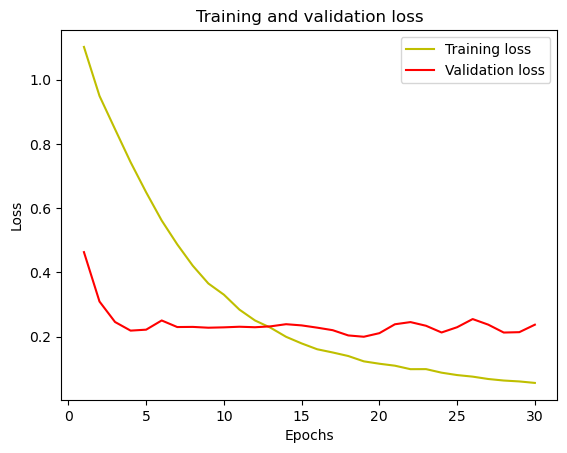

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

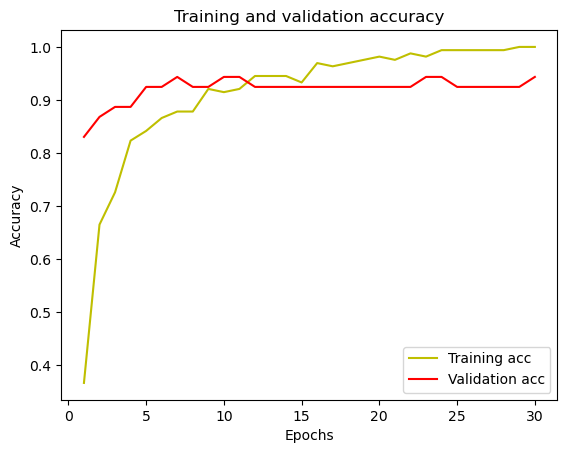

In [159]:
acc =history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# CNN 적용 

In [141]:
X = df.drop("target",axis = 1)
y = df["target"]

In [142]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [143]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [145]:
# Reshape data to fit into Conv1D
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# One-hot encode the labels
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]

In [146]:
input_layer = Input(shape=(n_timesteps, n_features))

conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
flat = Flatten()(conv1)
dens = Dense(64, activation="relu")(flat)
drop = Dropout(0.5)(dens)
outputs = Dense(n_outputs, activation="softmax")(drop)

model = Model(input_layer, outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 7, 1)]            0         
                                                                 
 conv1d_15 (Conv1D)          (None, 5, 64)             256       
                                                                 
 flatten_14 (Flatten)        (None, 320)               0         
                                                                 
 dense_31 (Dense)            (None, 64)                20544     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 3)                 195       
                                                                 
Total params: 20995 (82.01 KB)
Trainable params: 20995 (82

In [147]:
# Fit the model
history = model.fit(X_train, y_train_onehot, epochs=30, batch_size=32, validation_data=(X_test, y_test_onehot))

Epoch 1/30
6/6 [==============================] - 2s 70ms/step - loss: 0.9709 - accuracy: 0.6607 - val_loss: 0.8083 - val_accuracy: 0.7857
Epoch 2/30
6/6 [==============================] - 0s 14ms/step - loss: 0.7291 - accuracy: 0.8929 - val_loss: 0.6453 - val_accuracy: 0.7857
Epoch 3/30
6/6 [==============================] - 0s 14ms/step - loss: 0.5913 - accuracy: 0.8869 - val_loss: 0.5387 - val_accuracy: 0.7857
Epoch 4/30
6/6 [==============================] - 0s 18ms/step - loss: 0.4835 - accuracy: 0.8810 - val_loss: 0.4657 - val_accuracy: 0.7857
Epoch 5/30
6/6 [==============================] - 0s 21ms/step - loss: 0.4002 - accuracy: 0.8929 - val_loss: 0.4103 - val_accuracy: 0.7857
Epoch 6/30
6/6 [==============================] - 0s 23ms/step - loss: 0.3656 - accuracy: 0.8869 - val_loss: 0.3689 - val_accuracy: 0.8095
Epoch 7/30
6/6 [==============================] - 0s 22ms/step - loss: 0.3021 - accuracy: 0.8810 - val_loss: 0.3514 - val_accuracy: 0.8333
Epoch 8/30
6/6 [===========

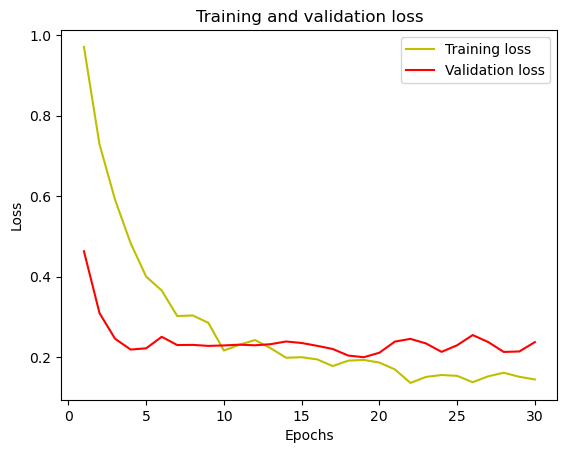

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

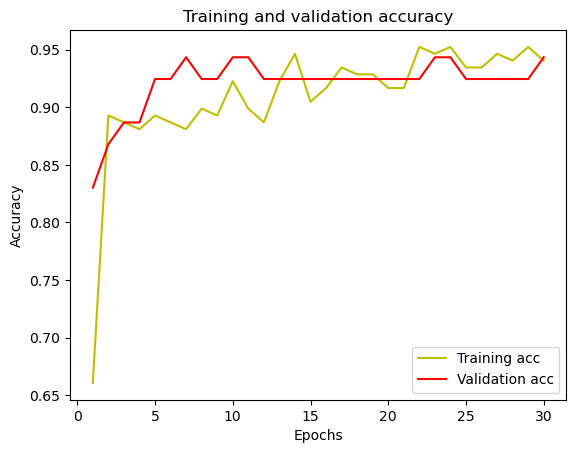

In [149]:
acc =history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()